# **MACHINE LEARNING BASED PREDICTION OF SALES**

---



---




# **BUSINESS OBJECTIVE**

---


---



*   The company **BigMart** has collected sales data for its products across different
stores in different cities.


*   The main aim of this machine learning project is to build a predictive model and predict the sales of each product at a particular store.


*   This model also aims to try to understand the properties of products and stores which play a key role in increasing sales.







# **DATA DESCRIPTION**


---



---
**Numerical features:**
*   Item_Weight : Weight of the product or item.
*   Item_Visibility : The % of the total display area in a store allocated to the particular product.
*   Item_MRP : Maximum Retail Price (list price) of the product
*   Outlet_Establishment_Year : The year in which the store was established.

**Categorical features:**
*  Item_Identifier : Unique product ID
*  Item_Fat_Content : Whether the product is low in fat or not
*  Item_Type : The category to which the product belongs.
*  Outlet_Identifier : Unique store ID
*  Outlet_Size : The size of the store in terms of ground area covered.
*  Outlet_Location_Type : The type of city in which the store is located.
*  Outlet_Type : Whether the outlet is just a grocery store or a supermarket.

**Target feature:**
*  **Item_Outlet_Sales** : sales value of a product in a particular store. This is the target variable to be predicted.

# **EXPLORATORY DATA ANALYSIS**

---



---



In [ ]:
# Importing the necessary libraries

import pandas as pd # for data analysis
import numpy as np # for numerical calculations and dealing with vectors and matrices
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

df1=pd.read_csv("/content/drive/MyDrive/bm_Train.csv")
df2=pd.read_csv('/content/drive/MyDrive/bm_Test.csv')

In [ ]:
# The dataset is available in two chunks , combining them to make a single dataset

df=pd.concat([df1,df2])
print(df.shape)

(14204, 12)


In [ ]:
# checking the datatype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
# Removing the rows with null values in the 'Item_Outlet_Sales' column, since it is the target variable and the missing value count is too high

sdf = df[df['Item_Outlet_Sales'].notnull()]

In [ ]:
sdf.shape

(8523, 12)

In [ ]:
# Checking the columns which contain null values

sdf.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# checking for duplicated rows
sdf[sdf.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# checking the distribution of numerical columns
sdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# checking values in object columns

sdf_list=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in sdf_list:
  print(i)
  print(sdf[i].value_counts())
  print("------------------------------")

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------
Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
------------------------------
Outlet_Size
Outlet_Size
Medium    2793


# **DATA VISUALIZATION**


---



---



**UNI-VARIATE ANALYSIS**

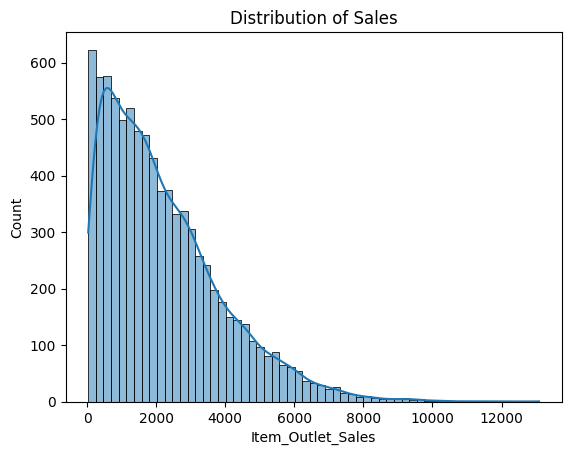

In [ ]:
sns.histplot(sdf['Item_Outlet_Sales'],kde=True)
plt.title('Distribution of Sales')
plt.show()

<Axes: xlabel='Item_Outlet_Sales'>

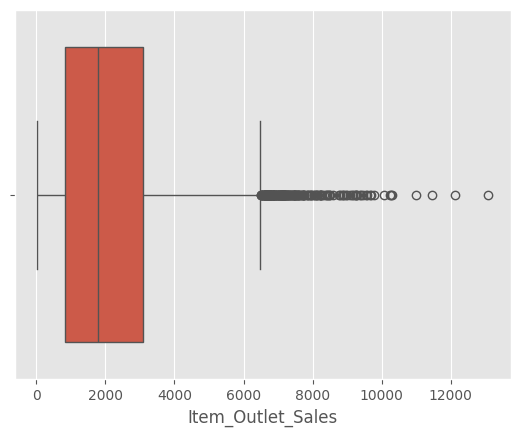

In [ ]:
sns.boxplot(x=sdf['Item_Outlet_Sales'])

**Item_Outlet_Sales feature distribution appears to be right skewed and the boxplot shows significant outliers present in the data**

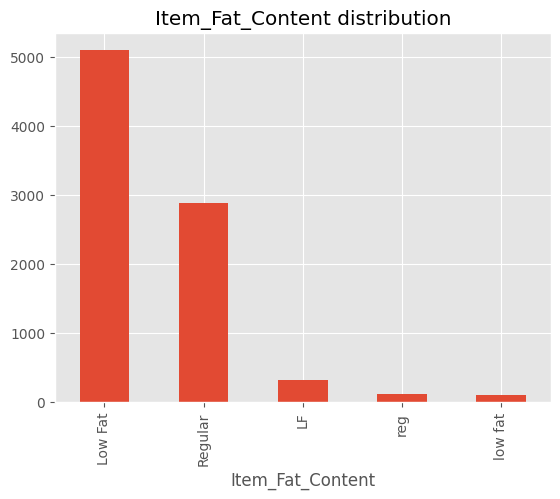

In [ ]:
sdf['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.title('Item_Fat_Content distribution')
plt.show()

**The values in Item_Fat_Content column appears to be duplicated during entry. There appears to be only two types low fat and regular and the others are duplicated entries**

<Axes: xlabel='Item_Visibility'>

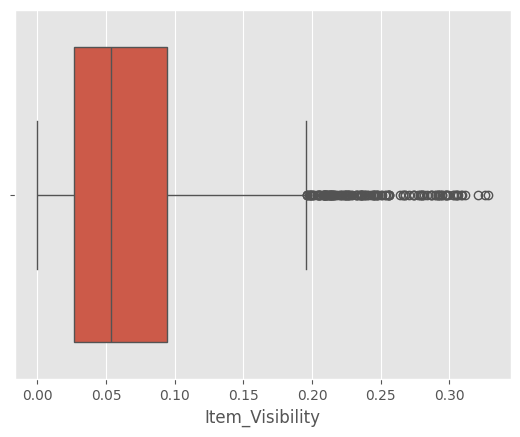

In [ ]:
sns.boxplot(x=sdf['Item_Visibility'])

**The 'Item_Visibility' column appears to have outliers.**

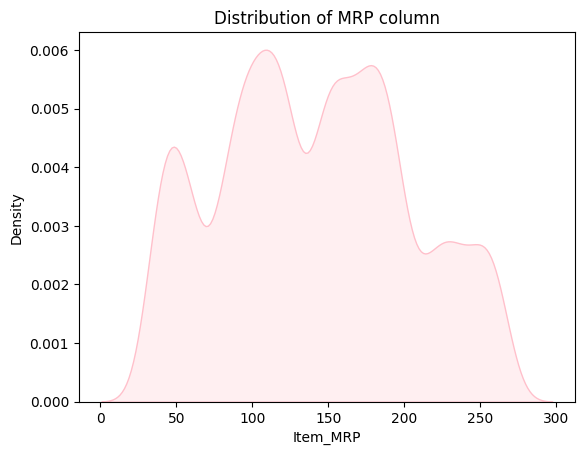

In [ ]:
sns.kdeplot(sdf['Item_MRP'],color='pink',fill='True')
plt.title('Distribution of MRP column')
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

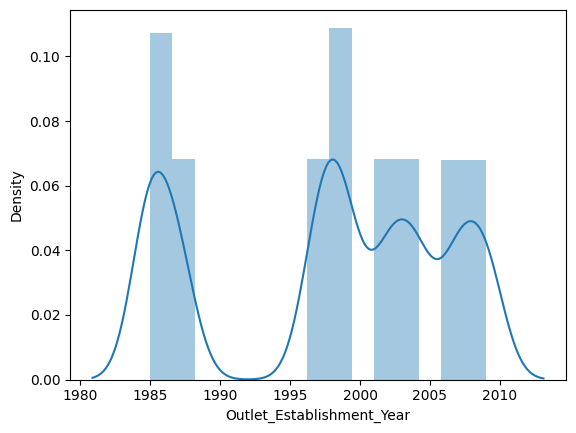

In [ ]:
sns.distplot(sdf['Outlet_Establishment_Year'])

**The distribution appears to be multimodal in nature.It can be observed that a lots of stores have been established in the years 1985, 1998 etc... and no store establishment between 1990 and 1995.**

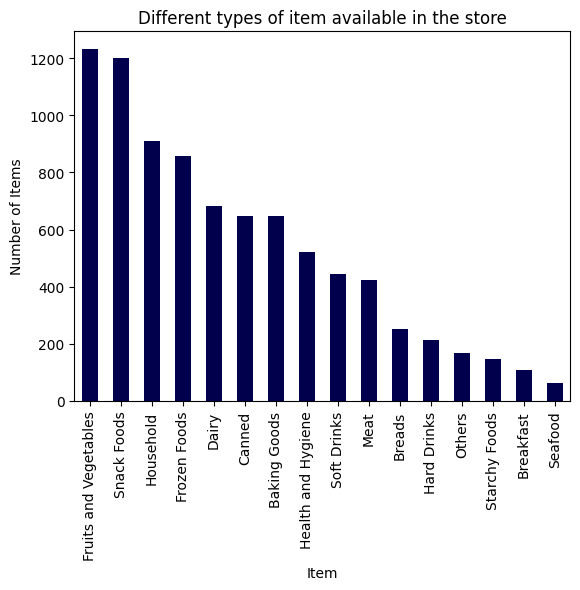

In [ ]:
sdf['Item_Type'].value_counts().plot.bar(cmap="seismic")
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

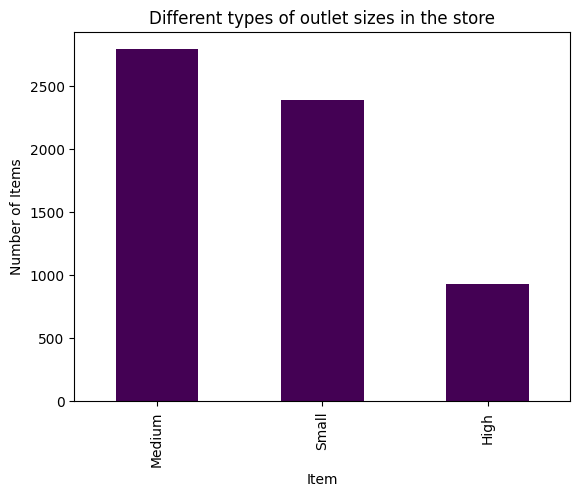

In [ ]:
sdf['Outlet_Size'].value_counts().plot.bar(cmap='viridis')
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

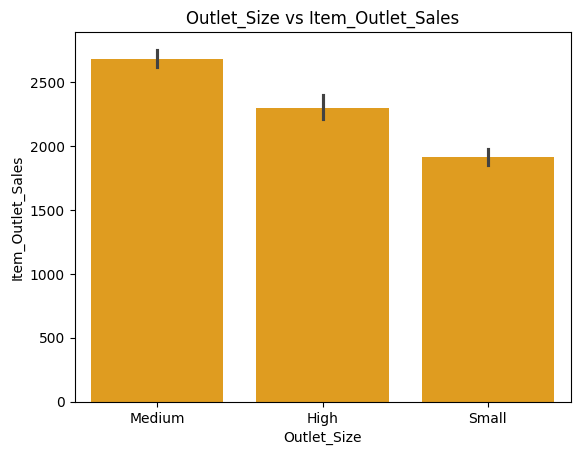

In [ ]:
sns.barplot(x=sdf['Outlet_Size'],y=sdf['Item_Outlet_Sales'],color='orange')
plt.title('Outlet_Size vs Item_Outlet_Sales')
plt.show()

**BI-VARIATE ANALYSIS**

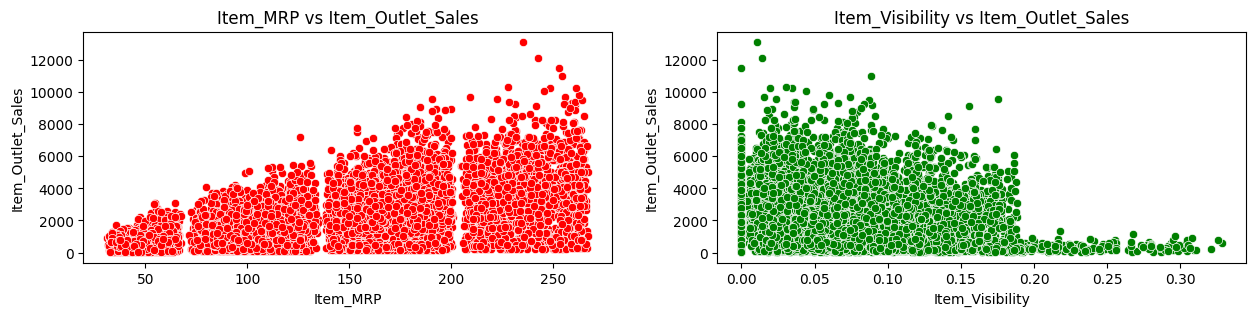

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.scatterplot(x=sdf['Item_MRP'],y=sdf['Item_Outlet_Sales'],color='red')
plt.title('Item_MRP vs Item_Outlet_Sales')

plt.subplot(1,2,2)
sns.scatterplot(x=sdf['Item_Visibility'],y=sdf['Item_Outlet_Sales'],color='green')
plt.title('Item_Visibility vs Item_Outlet_Sales')
plt.show()

**The graph shows a strong positive correlation between the two columns Item_MRP and Item_Outlet_Sales.**

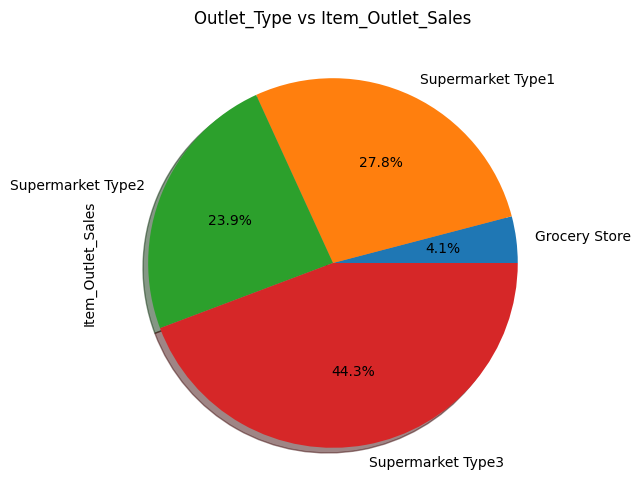

In [ ]:
plt.figure(figsize=(6,6))
sdf.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='pie',autopct='%1.1f%%',shadow=True)
plt.title('Outlet_Type vs Item_Outlet_Sales')
plt.show()

**The outlet type 'Super market type 3 ' has the major chunk of sales volume.**

# **DATA PRE-PROCESSING**


---



---



**HANDLING MISSING VALUES**


* Item_Weight is a numerical column.The missing values can be imputed using mean.
* Outlet_Size is a categorical column.The missing values can be imputed using mode.



In [ ]:
sdf['Item_Weight'] = sdf['Item_Weight'].replace(0, np.NaN)
sdf['Item_Weight'].fillna(sdf['Item_Weight'].mean(), inplace = True)

sdf['Outlet_Size'].fillna(sdf['Outlet_Size'].mode()[0], inplace = True)

**HANDLING DUPLICATED VALUES**





In [ ]:
sdf.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','Regular':'reg'}},inplace=True)

In [ ]:
sdf['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
reg,3006


**FEATURE ENGINEERING**

Creating a new column to represent the number of years the outlet has been functioning.

In [ ]:
import datetime
sdf['Outlet_Age'] = datetime.datetime.now().year - sdf['Outlet_Establishment_Year']

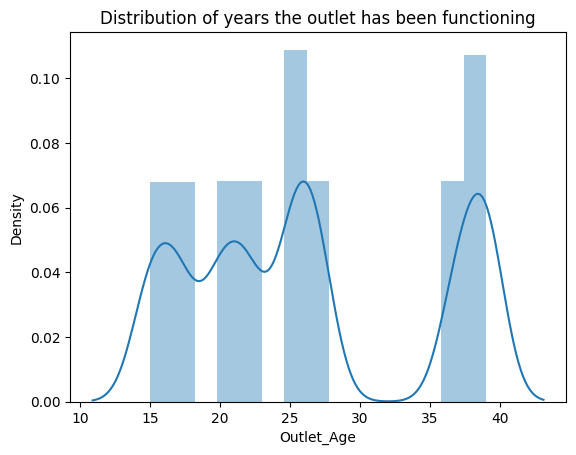

In [ ]:
sns.distplot(sdf['Outlet_Age'])
plt.title("Distribution of years the outlet has been functioning")
plt.show()


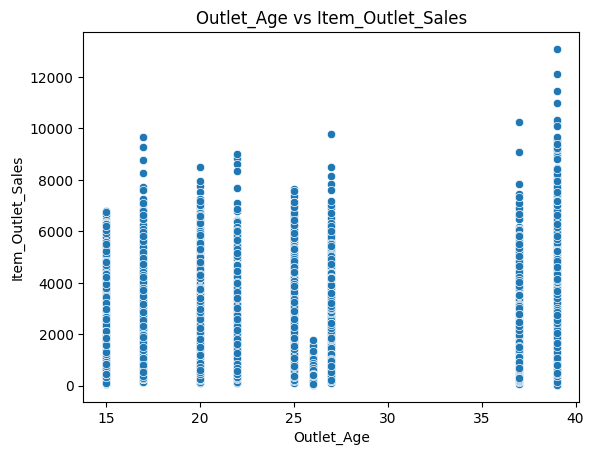

In [ ]:
sns.scatterplot(x=sdf['Outlet_Age'],y=sdf['Item_Outlet_Sales'])
plt.title('Outlet_Age vs Item_Outlet_Sales')
plt.show()

**Extracting the first two characters of the column 'Item_Identifier' to classify the items into finite categories.**

In [ ]:
# Getting the first two characters of ID to separate them into different categories

sdf['Item_Identifier'] = sdf['Item_Identifier'].apply(lambda x: x[0:2])

sdf['Item_Identifier'] = sdf['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

sdf['Item_Identifier'].value_counts()

,count
Item_Identifier,
Food,6125
Non_Consumable,1599
Drinks,799


**Extracting the last character of the column 'Outlet_Location_Type' and making it a numerical feature.**

In [ ]:
sdf['Outlet_Location_Type'] = sdf['Outlet_Location_Type'].str[-1:].astype(int)

In [ ]:
sdf['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
3,3350
2,2785
1,2388


In [ ]:
sdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,Food,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380,25
1,Drinks,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228,15
2,Food,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700,25
3,Food,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,3,Grocery Store,732.3800,26
4,Non_Consumable,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052,37


**FEATURE ENCODING**

Using get_dummies function to encode the nominal columns.
*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type


In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

sdf.apply(LabelEncoder().fit_transform)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,1,284,0,664,4,5592,9,4,1,0,1,2540,4
1,0,57,1,880,14,473,3,8,1,2,2,422,0
2,1,376,0,715,10,2901,9,4,1,0,1,1639,4
3,1,393,1,0,6,4227,0,3,1,2,0,670,5
4,2,265,0,0,9,627,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,125,0,3912,13,4955,1,1,0,2,1,2047,7
8519,1,233,1,3278,0,2023,7,5,1,1,1,516,3
8520,2,299,0,2302,8,1263,6,6,2,1,1,1018,2
8521,1,149,1,7175,13,1857,3,8,1,2,2,1466,0


In [ ]:
sdf.shape

(8523, 13)

In [ ]:
# one hot encoding

sdf = pd.get_dummies(sdf,drop_first=True)

print(sdf.shape)

(8523, 39)


# TRAINING THE MODELS


---



---



In [ ]:
# split the data into Target variable and Independent columns
# y holds the Target Variable

y = sdf['Item_Outlet_Sales']



In [ ]:
# x holds all the independent variables.
x = sdf.drop('Item_Outlet_Sales', axis = 1)

In [ ]:
# cross validation
# Splitting the data into Train and Test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**MODEL 1: LINEAR REGRESSION**


---



In [ ]:
# Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Evaluating model 1
y_pred1=lr.predict(x_test)

In [ ]:
# finding the mean squared error and R2 score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred1)
print('RMSE :', np.sqrt(mse))
print('R2 score: %.2f' % r2_score(y_test, y_pred1))
lr_rmse=np.sqrt(mse)
lr_r2=r2_score(y_test, y_pred1)

RMSE : 1131.929802243876
R2 score: 0.56


**MODEL 2:DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

# predicting the test set results
y_pred2 = dt.predict(x_test)


In [ ]:
dtmse = mean_squared_error(y_test, y_pred2)
dt_rmse=np.sqrt(dtmse)
dt_r2=r2_score(y_test, y_pred2)
print('RMSE :', np.sqrt(dtmse))
print('R2 score: %.2f' % r2_score(y_test, y_pred2))

RMSE : 1555.6996967463538
R2 score: 0.17


**MODEL 3: RANDOM FOREST**


---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
rf.fit(x_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [ ]:
# predicting the  test set results
y_pred3 = rf.predict(x_test)


In [ ]:
# finding the mean squared error and variance
rfmse = mean_squared_error(y_test, y_pred3)
rf_rmse=np.sqrt(rfmse)
rf_r2=r2_score(y_test, y_pred3)
print("RMSE :",np.sqrt(rfmse))
print('R2 score: %.2f' % r2_score(y_test, y_pred3))

print("Result :",rf.score(x_train, y_train))


RMSE : 1130.341443502605
R2 score: 0.56
Result : 0.9378606530306557


**CROSS-VALIDATION**

In [ ]:
# k fold cross validation for RandomForest model
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,scoring="r2",cv=5)
print(cv_score)

[0.57249002 0.52585647 0.52513301 0.5586409  0.57590789]


**MODEL 4:XGBOOST**


---



In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions for XGBoost on the test data
y_pred4 = xgb.predict(x_test)

In [ ]:
# Evaluation
xgb_mse = mean_squared_error(y_test , y_pred4)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred4)

print('RMSE :', np.sqrt(xgb_mse))
print('R2 score: %.2f' % r2_score(y_test, y_pred4))

RMSE : 1206.5570563263143
R2 score: 0.50


In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,x,y,cv=5,scoring='r2')
print(scores)
xg_r2=scores.mean()

[0.60764094 0.57663856 0.57414987 0.6029975  0.60889272]


**COMPARING THE MODELS**


---



In [ ]:
d={'ML ModelName':['Linear Regression','DecisionTree','RandomForest','XGBoost'],
   'RMSE':[lr_rmse,dt_rmse,rf_rmse,xgb_rmse],
   'R2_scores':[lr_r2,dt_r2,rf_r2,xg_r2]}
ml_score=pd.DataFrame(d)
ml_score

,ML ModelName,RMSE,R2_scores
0,Linear Regression,1131.929802,0.562239
1,DecisionTree,1555.699697,0.173106
2,RandomForest,1130.341444,0.563467
3,XGBoost,1206.557056,0.594064


**CONCLUSION**


---

**The XGBoost model has the best R2 score in comparison with the other models.**